# MA336_2211744

# Bank Marketing Analysis

# Introduction

This study is based on a direct promotional campaign which was run by a Portuguese banking institution. The campaign's purpose was to pitch term deposits to current bank clients, and the dataset includes useful insights about the campaign's performance. The dataset can be found at the UCI Machine Learning Repository, which is a popular repository for machine learning datasets and research. The dataset may be found at the following URL: https://archive.ics.uci.edu/dataset/222/bank+marketing. The Bank Marketing dataset is comprised of a single CSV file comprising information from 45,211 customer records. Each record has a variety of variables that capture demographic, economic, and other pertinent information about the clients. The dataset comes with an outcome variable that indicates whether or not the consumer enrolled to a term deposit. Main aim of this study is to train and evaluate machine learning and deep learning models to evaluate what is more suitabe in predicting the target variable. I chose this data set for this study as it has a great amount of observations which is a key impact on accuracy of models when training and testing models. It also has a rich amount of features which gives more inputs in predicting the target variable. This data set is popular in the field of marketing and machine learning.


As the basic steps, I am reading the csv file into a data frame and check the shape and structure of the dataset.

In [1]:
#Import libraries that need to use the functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Enable multiple outputs of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
#Load dataset
df = pd.read_csv('C:/Users/Dilshani/OneDrive - University of Essex/MA336/Assignment/bank-full.csv'
                 , delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


According to the structure of the data set, you can see that there are both categorical and numeric attributes. Following are the descriptions of the features.

#### Categorical Variables:

- job : type of job (values: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- marital : marital status (values: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education:(values:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- default: has credit in default? (values: 'no','yes','unknown')

- housing: has housing loan? (values: 'no','yes','unknown')

- loan: has personal loan? (values: 'no','yes','unknown')

- contact: contact communication type (values: 'cellular','telephone')

- month: last contact month of year (values: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- day_of_week: last contact day of the week (values: 'mon','tue','wed','thu','fri')

- poutcome: outcome of the previous marketing campaign (values: 'failure','nonexistent','success')

#### Numeric Variables:

- age

- balance (account balance)

- duration: last contact duration, in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- campaign: number of contacts performed during this campaign and for this client (includes last contact)

- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

- previous: number of contacts performed before this campaign and for this client 

#### Target Variable

 y - has the client subscribed a term deposit? (binary: 'yes','no')

Age, job, marital ,education , default, balance (account balance), housing, loan can be considered as data related to bank clients while contact, month, day_of_week, duration can be considered as data related to the campaign. There are other attributes such as campaign, pdays, previous and poutcome

# Exploratory Data Analysis

To begin the EDA, I checked for missing values and values stated as "unknown". There are no missing values in this dataset. However, there are 'poutcome' and 'contact' columns with value 'unknown'. Due to the higher amount of records with 'unknown' value, I deicded to consider it as a seperate category of the two attributes instead of removing or replacing with another value.

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df['poutcome'].value_counts()['unknown'], df['contact'].value_counts()['unknown']

(36959, 13020)

### Analysing target variable

First, let's explore the target variable. It has two values of 'yes' and 'no' which respectively means 'subscribed' and 'not subscribed' to term deposits. According to the pie chart drawn below, it is obvious that 88% of the records belong to 'not subscribed' category. This is clearly a class imbalance scenario. Nevertheless, sometimes, models for classification problems gives better accuracy for class imbalanced data sets. Therefore, I will not be using any technique like resampling or class weight to mitigate the issue. 

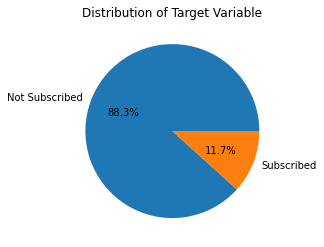

In [11]:
y_counts = df['y'].value_counts()
plt.figure(figsize=(4, 4))
labels = ['Not Subscribed', 'Subscribed']
plt.pie(y_counts.values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.show();

In [12]:
y_counts.values

array([39922,  5289], dtype=int64)

Following is a heatmap drawn to present the correlation of numeric variables. Apart from 'pdays' with 'previous', rest of the pairs have negative or closer to zero correlations. 

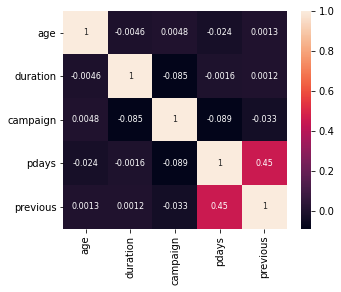

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_data = df[["age","duration","campaign", "pdays", "previous"]]
corr = corr_data.corr()
plt.figure(figsize=(5, 4))
cor_plot = sns.heatmap(corr, annot=True, annot_kws={"fontsize": 8})
plt.show();

### Analyzing Categorical Variables

Next, I am going to analyze the categorical variables.

In [14]:
num_var = ["age","duration","campaign", "pdays", "balance", "previous"]
cat_var=[i for i in df.columns if i not in num_var and i != 'y']

In [15]:
df['marital'].unique()
df['housing'].unique()

array(['married', 'single', 'divorced'], dtype=object)

array(['yes', 'no'], dtype=object)

In [16]:
#pip install category_encoders

In [17]:
# Encode target variable using OrdinalEncoder
from category_encoders import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(cols=['y'])
df_encoded = ordinal_encoder.fit_transform(df)
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


First, I am plotting job type and education level grouped by if the customers have subscribed to term deposits or not in grouped countplots. In the below plots, you can see that for in attributes, all the categories display greater records for customers who has not subscribed to term deposits. 

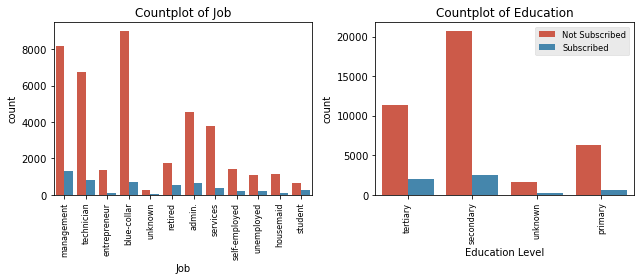

In [18]:
#Plotting job type and education level 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
# Plot 1 - Job
plt.style.use("ggplot")
sns.countplot(x='job', hue='y', data=df_encoded, ax=ax1)
ax1.set_title('Countplot of Job', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)
ax1.set_xlabel('Job', fontsize=10)
ax1.legend().remove()
# Plot 2 - Education
plt.style.use("ggplot")
sns.countplot(x='education', hue='y', data=df_encoded, ax=ax2)
ax2.set_title('Countplot of Education', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)
ax2.legend(labels=['Not Subscribed', 'Subscribed'], fontsize='small')
ax2.set_xlabel('Education Level', fontsize=10)
plt.tight_layout()
plt.show();

According to the below grouped count plots of Marital status and housing loan depicts that married category and holding housing loans are less prone to subscribed to term deposits. However, other categories of single, divorced and no housing loan also depicts higher counts for not subscribe to term deposits.

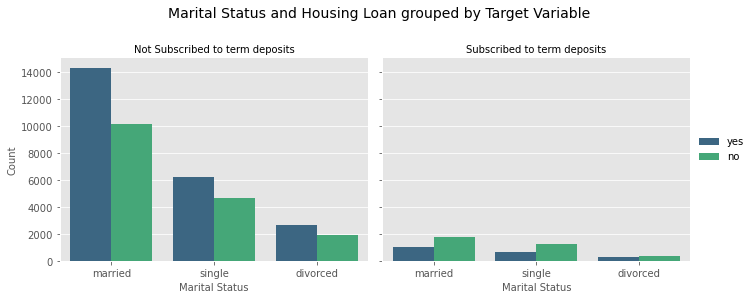

In [19]:
g = sns.catplot(x='marital', hue='housing', col='y', data=df_encoded, kind='count', height=4, 
                aspect=1.2, palette='viridis')
plt.style.use("ggplot")
plt.subplots_adjust(top=0.8)
g.set_titles(col_template="{col_name} = {col_var}")
g.fig.suptitle('Marital Status and Housing Loan grouped by Target Variable', fontsize=14)
g.set_xlabels('Marital Status', fontsize=10)
g.set_ylabels('Count', fontsize=10)
g._legend.set_title('')
g.axes[0][0].set_title('Not Subscribed to term deposits', fontsize=10)
g.axes[0][1].set_title('Subscribed to term deposits', fontsize=10)
plt.show();

Below two plots depicts that the most number of last contact with customers were made in month of May and during the campaign most contacts were made on 20th of the month. December is the month with least contacts and 1st of a month is the day least number of contacts were made

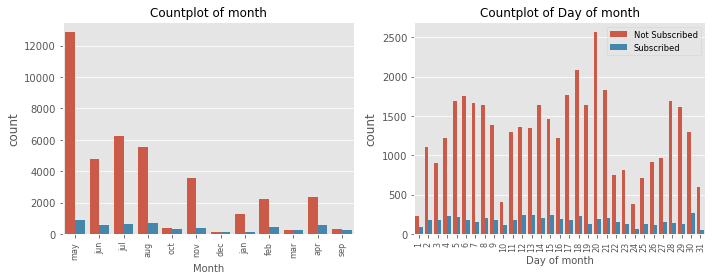

In [20]:
#Plotting marital status and housing loan 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
# Plot 1 - Job
plt.style.use("ggplot")
sns.countplot(x='month', hue='y', data=df_encoded, ax=ax1)
ax1.set_title('Countplot of month', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)
ax1.set_xlabel('Month', fontsize=10)
ax1.legend().remove()
# Plot 2 - Education
plt.style.use("ggplot")
sns.countplot(x='day', hue='y', data=df_encoded, ax=ax2)
ax2.set_title('Countplot of Day of month', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)
ax2.legend(labels=['Not Subscribed', 'Subscribed'], fontsize='small')
ax2.set_xlabel('Day of month', fontsize=10)
plt.tight_layout()
plt.show();

According to the below plots, you can see that the outcome of the contacts are not known for most of the observations. However, it can be said that both most success and failure outcomes have gaine dthrough celluar contacts. Overall, the cellular contacts have been a success compared to other contact types.

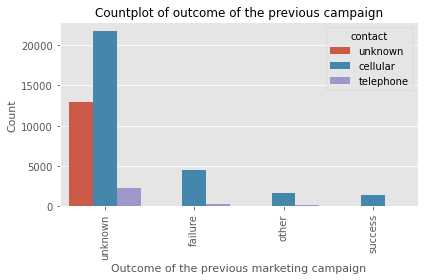

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.style.use("ggplot")
sns.countplot(x='poutcome', hue='contact', data=df_encoded, ax=ax)
ax.set_title('Countplot of outcome of the previous campaign', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Outcome of the previous marketing campaign', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
plt.tight_layout()
plt.show();

### Analyzing Numeric Data

The following grouped scatter plot of account balance drawn against age potray that people aged from 20 to 100 has both subscribed and not subscribed to term deposits. However, people holding accounts with balance of 0 to 20000 has subscribed to term deposits more than customers with balance over 20000. 

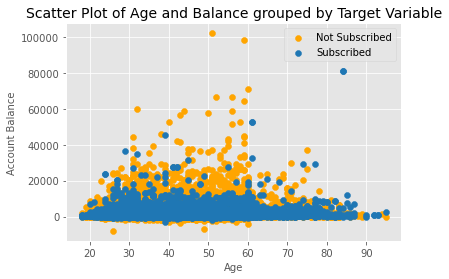

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df.loc[df['y'] == 'no'].age, df.loc[df['y'] == 'no'].balance, 
           color='orange', label='Not Subscribed')
ax.scatter(df.loc[df['y'] == 'yes'].age, df.loc[df['y'] == 'yes'].balance, 
           color='tab:blue', label='Subscribed')
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Account Balance', fontsize=10)
ax.set_title('Scatter Plot of Age and Balance grouped by Target Variable', fontsize=14)
ax.legend()
plt.show();

According to the below plots, it can be said that more people have not subscribed to term deposits even though contacts were made. However, according to the plots it can be said that less duration of contact has made a better impact than contacts made for long durations. Moreover, it can be said that lesser the number of contacts made, more the customers have subscribed to term deposits.

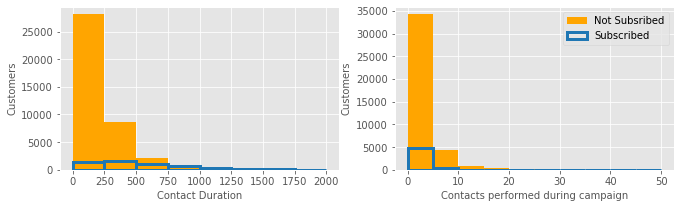

In [23]:
import matplotlib.pyplot as plt
bins_duration = [0,250,500,750,1000,1250,1500,1750,2000]
bins_campaign = [0,5,10,15,20,25,30,35,40,45,50]
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 3))

ax3.hist(df.loc[df['y']=='no'].duration,bins=bins_duration,color='orange',
         label='Not Subsribed')
ax3.hist(df.loc[df['y']=='yes'].duration,bins=bins_duration,facecolor='none',
         edgecolor='tab:blue',linewidth=3,label='Subscribed')
ax3.set_xlabel('Contact Duration', fontsize=10)
ax3.set_ylabel('Customers', fontsize=10)

ax4.hist(df.loc[df['y']=='no'].campaign,bins=bins_campaign,color='orange',
         label='Not Subsribed')
ax4.hist(df.loc[df['y']=='yes'].campaign,bins=bins_campaign,facecolor='none',
         edgecolor='tab:blue',linewidth=3,label='Subscribed')
ax4.set_xlabel('Contacts performed during campaign', fontsize=10)
ax4.set_ylabel('Customers', fontsize=10)
ax4.legend()
plt.show();

The below plot of number of days passed after the contact was made potray that number of days passed does not highly impact on customers subscribing to term deposits. Only few customers has subscribed tp term deposits in first 50 days. Most of the term deposits has been opened after 50 to 200 days passed after last contact was made. The second plot of number of contact made before the campaign shows that more customers have not subscribed to term deposit before the campaign.

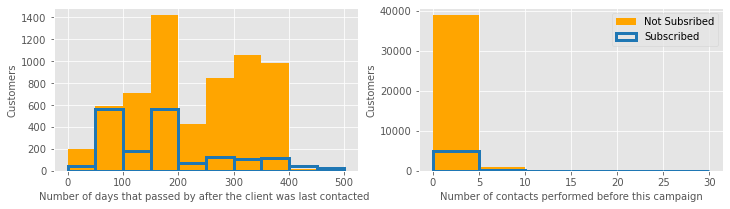

In [24]:
bins_pdays = [0,50, 100,150,200,250,300,350,400,450,500]
bins_previous = [0,5,10,15,20,25,30]

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 3))

ax5.hist(df.loc[df['y']=='no'].pdays,bins=bins_pdays,color='orange',
         label='Not Subsribed')
ax5.hist(df.loc[df['y']=='yes'].pdays,bins=bins_pdays,facecolor='none',
         edgecolor='tab:blue',linewidth=3,label='Subscribed')
ax5.set_xlabel('Number of days that passed by after the client was last contacted ', 
               fontsize=10)
ax5.set_ylabel('Customers', fontsize=10)

ax6.hist(df.loc[df['y']=='no'].previous,bins=bins_previous,color='orange',
         label='Not Subsribed')
ax6.hist(df.loc[df['y']=='yes'].previous,bins=bins_previous,facecolor='none',
         edgecolor='tab:blue',linewidth=3,label='Subscribed')
ax6.set_xlabel('Number of contacts performed before this campaign', fontsize=10)
ax6.set_ylabel('Customers', fontsize=10)

ax6.legend()
plt.show();

Below are the boxplots drawn for all the numeric variables. Boxplots are the most suitable plots to identify the outliers. All the numeric variables shows outliers in the data set. Although, campaign, pdays, balance and previous display heavy outliers in the plots.

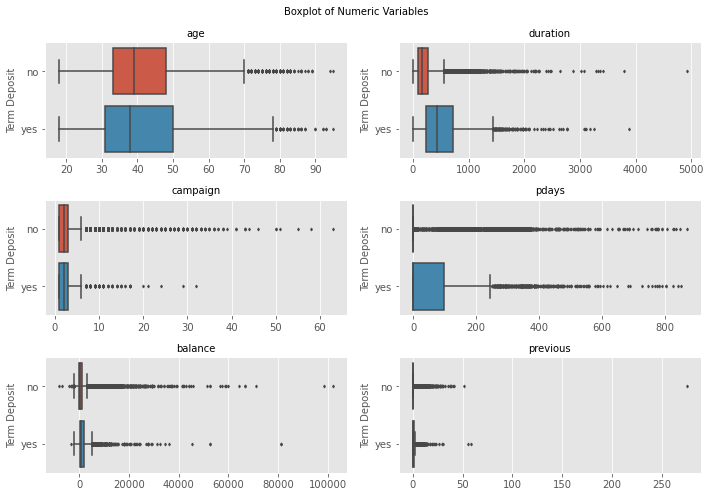

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10, 7))
ax = ax.flatten()

for i, column in enumerate(num_var):
    sns.boxplot(data=df, x=column, y='y', ax=ax[i], fliersize=2)
    ax[i].set_title(column, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Term Deposit', fontsize=10)

fig.suptitle('Boxplot of Numeric Variables', fontsize=10)

plt.tight_layout()
plt.show();


### Cleaning Data

In order to clean data, I am going to check if any missing values are in the data set as follows. The result shows that there are no missing values.

In [26]:
import pandas as pd
Features = df.columns.tolist()
for feature in Features:
    num = 0
    for i in range(0,len(df)):
        if pd.isnull(df.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs for', feature ,'is', num)

NaNs for age is 0
NaNs for job is 0
NaNs for marital is 0
NaNs for education is 0
NaNs for default is 0
NaNs for balance is 0
NaNs for housing is 0
NaNs for loan is 0
NaNs for contact is 0
NaNs for day is 0
NaNs for month is 0
NaNs for duration is 0
NaNs for campaign is 0
NaNs for pdays is 0
NaNs for previous is 0
NaNs for poutcome is 0
NaNs for y is 0


At the end of the previous section, I stated that there are many outliers present in the data set. However, I am not going to remove the records with outliers because it will dramatically reduce the number of records.

### Encoding data

In order to perform rest of the tasks, I am encoding the categorical variabes to numerical variables. As the categorical variables have multiple categories, I am using OrdinalEncoder

In [27]:
from category_encoders import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(cols=['job','marital', 'education',
                                       'default','housing','loan',
                                       'contact','month', 'poutcome', 
                                       'y'])
df_encoded = ordinal_encoder.fit_transform(df)

In [28]:
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,1,1,1,2143,1,1,1,5,1,261,1,-1,0,1,1
1,44,2,2,2,1,29,1,1,1,5,1,151,1,-1,0,1,1
2,33,3,1,2,1,2,1,2,1,5,1,76,1,-1,0,1,1
3,47,4,1,3,1,1506,1,1,1,5,1,92,1,-1,0,1,1
4,33,5,2,3,1,1,2,1,1,5,1,198,1,-1,0,1,1


# Methods and Results

In this section, I am going to implement 2 machine learning models and 1 deep learning model to predict the target variable and evaluate the models. First model I am going to build and evaluate is 'Decision Tree' model.

## Decision Tree Classifier

- So as to perform the ML and DL models, I am splitting my data set to training and testing data sets. According to the thumb rule, I am allocating 30% of the dataset as the test and rest 70% as the training data set.
- Next I am creating the model 'decision_tree' with a maximum depth of 3 and random state 10 using the 'DecisionTreeClassifier' from sklearn.tree library 
- The, the model is next trained with training data set and used to predict target variables using the testing data set.
- Accuracy is calculated using 'metrics.accuracy_score' from sklearn.metric library with use of labels of the training data set and predicted labels.
- Finally the feature importance are obtained using the 'feature_importances_' attribute.

In [29]:
from sklearn.model_selection import train_test_split
X=df_encoded.drop(['y'],axis=1)
X_names = Features[:-1]
y=df_encoded['y'] 
y_names=['Yes','No']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=2, stratify=y)  

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=10) 
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)

from sklearn import metrics
print("Accuracy on test set:",np.round(metrics.accuracy_score(y_test, y_pred),2))

# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(X_names): 
    feature_importances_dict.update({name : decision_tree.feature_importances_[i]})
    feature_importances_sorted = dict(sorted(feature_importances_dict.items(), 
                                             key=lambda x:x[1], reverse=True)) 
print('Features in order of importance:')   
for key in feature_importances_sorted:
    print(key)

DecisionTreeClassifier(max_depth=3, random_state=10)

Accuracy on test set: 0.9
Features in order of importance:
duration
poutcome
month
contact
age
job
marital
education
default
balance
housing
loan
day
campaign
pdays
previous


The decision tree model displays an accuracy of 90% which is an excellent accuracy score for a machine learning model.
Next, I am going to visualize the steps of the built decision tree as below.

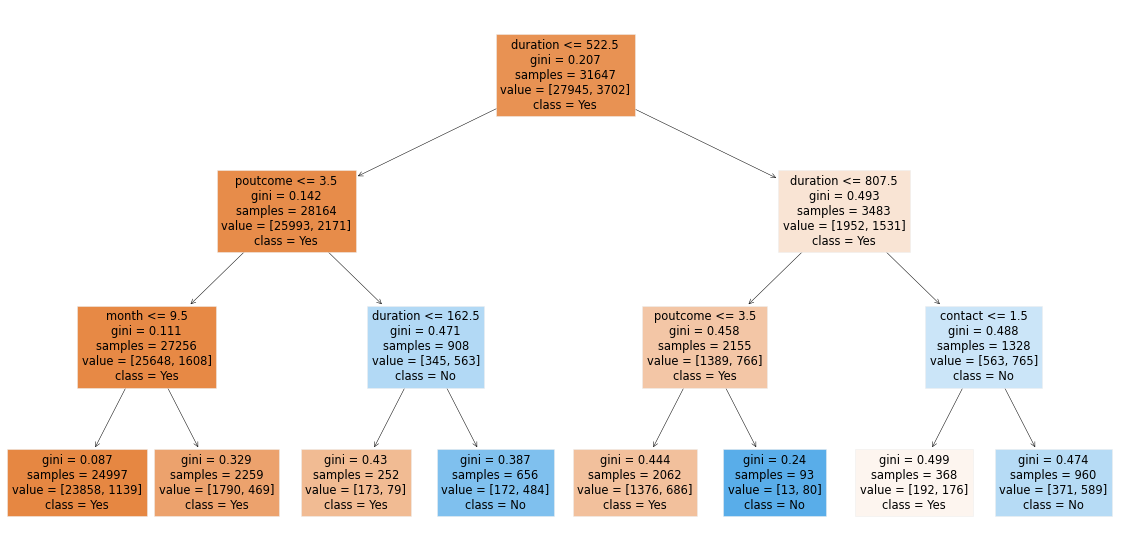

In [30]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_names,
                   class_names=y_names,filled=True) 

According the above plot, you can see that the decision tree has started to split the child nodes according to the duration value. It has checked if the duration value is less than or equal to 522.5 and splited the child nodes. 'Gini' is the gini impurity value for each node and 'sample' is the number of observations in each node. A high gini value implies a good mingling across classes. 'Value' is the number of 'no' and 'yes' values of target variable in the data set. the 'class' is assigned based on the number of samples. After spliting the child according to duration value, the left child has considered 'poutcome' as a criteria to split it's child nodes while right child has further filtered child nodes according to duration value. The left level 1 child node has 2 child nodes where they consider 'month' and 'duration' as criteria respectively. The right level 1 child node has 2 child nodes where they consider 'poutcome' and 'contact' as criteria respectively. Then the level 3, the last level of the decision tree has been splitted to 8 nodes according to the criteria of 2nd level child nodes. 

Next, I am plotting to see the behaviour of accuracy of the model when the max depth of the decision tree is being increased.

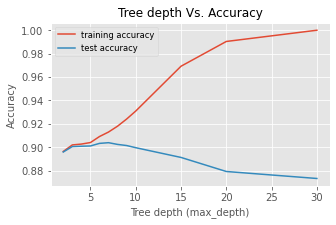

In [31]:
# Plot accuracy as a function of max_depth 
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20,30]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], 
                                                random_state=i)
    decision_tree.fit(X_train,y_train)
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

# Plot accuracy as a function of max_depth
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 3))
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training accuracy')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test accuracy')
plt.legend(handles=[line1, line2], fontsize='small')
plt.title("Tree depth Vs. Accuracy", fontsize=12)
plt.xlabel("Tree depth (max_depth)", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.show();

This can be introduced as "overfitting". It can be clearly seen in the plot that with increasing the tree depth, training accuracy is increasing and reaching 100%. At the same time, testing accuracy is gradually decreasing and reaches 30% which is a very low accuracy for a machine learning model.

### Accuracy using k-fold cross-validation

Next, I am using cross validation to check accuracy. The decision tree classifier with a maximum depth of three is evaluated using 5-fold cross-validation. The dataset is divided into five folds, and the classifier is trained on each fold before being assessed to determine its accuracy. The average accuracy is determined by taking the mean of the accuracy scores and computing the standard deviation to express the performance variability between folds. The results are then printed, together with the accompanying standard deviation, the average performance of the decision tree classifier with a maximum depth of 3, and the cross-validation scores for each fold. This gives an estimate of the classifier's average performance and the degree of accuracy variability across various folds.

In [32]:
from sklearn.model_selection import cross_val_score
import math
maxDepth = 3
k=5
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
cv_scores = cross_val_score(decision_tree, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)
avg = sum(cv_scores)/len(cv_scores)
sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance for a tree depth of',maxDepth,'is:',
      np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.88300343 0.80911303 0.88321168 0.38885202 0.83278036]
Average performance for a tree depth of 3 is: 75.9 +/- 21.0 %


The decision tree model with a tree depth of 3 achieved variable performance across several folds, according to the cross-validation scores. The cross-validation scores show how well the model performs on various data sets. With a standard deviation of 21.0%, the performance for a tree depth of 3 is roughly 75.9% on average. Accordingly, the performance of the model can vary by about 21.0% over several folds, demonstrating some degree of stability in its predictions.

Next, I used cross-validation on a decision tree classifier to evaluate its performance at different maximum depths (max_depth_vals). It calculates the mean accuracy and standard deviation of accuracy scores for each maximum depth value using both 5-fold and 10-fold cross-validation.After computing the mean accuracy and standard deviation values for both 5-fold and 10-fold cross-validation, the code generates a plot with two subplots which shows the mean accuracy values and their standard deviations for 5-fold cross-validation, while the second subplot displays the same information for 10-fold cross-validation. The x-axis represents the maximum depth values, and the y-axis represents the mean accuracy. Error bars are plotted to indicate the range of variability. The plot provides insights into how the mean accuracy changes with different maximum depth values, allowing for the selection of an optimal maximum depth for the decision tree classifier.

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'Tree depth (max_depth)')

Text(0, 0.5, 'Mean accuracy')

(0.7, 0.9)

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'Tree depth (max_depth)')

Text(0, 0.5, 'Mean accuracy')

(0.7, 0.9)

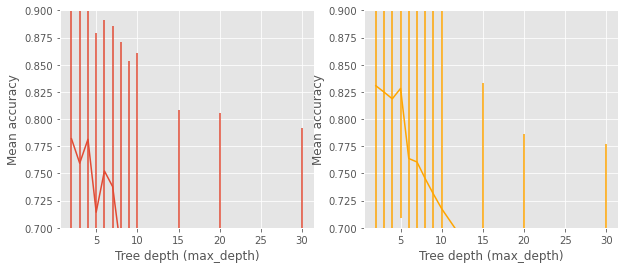

In [33]:
from sklearn.model_selection import cross_val_score
import math
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20,30]
# 5-fold
k=5
mean_accuracy_cv_k5 = []
sd_cv_k5 = []
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], 
                                                random_state=i)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
    mean_accuracy_cv_k5.append(avg)
    sd_cv_k5.append(sd)
    
# 10-fold 
k=10
mean_accuracy_cv_k10 = [] 
sd_cv_k10 = []
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], 
                                                random_state=i)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
    mean_accuracy_cv_k10.append(avg)
    sd_cv_k10.append(sd)
    
# Make the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].errorbar(max_depth_vals,mean_accuracy_cv_k5,yerr=sd_cv_k5)
ax[0].set_xlabel("Tree depth (max_depth)")
ax[0].set_ylabel("Mean accuracy")
ax[0].set_ylim([0.70,0.9])
ax[1].errorbar(max_depth_vals,mean_accuracy_cv_k10,yerr=sd_cv_k10, color="orange")
ax[1].set_xlabel("Tree depth (max_depth)")
ax[1].set_ylabel("Mean accuracy")
ax[1].set_ylim([0.70,0.9])
plt.show();

## Feature Importance

Next, I used get_feature_importance function to get the imortance of features of random forest model to compare them with the list obtained for decision tree classifier. According to the below plot, both gives comparable feature importance list.

<ipython-input-34-c0807e11dce9>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X_names, rotation=45, ha='right')


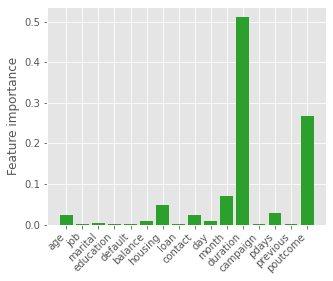

In [34]:
import warnings
import random
# Filter out the specific warning messages
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

def get_feature_importances(X, y, randomState, maxDepth):
    from sklearn import tree, model_selection
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                        test_size=0.3, 
                                                                        random_state=randomState, 
                                                                        stratify=y)  
    decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, 
                                                random_state=randomState)
    decision_tree.fit(X_train, y_train)
    return decision_tree.feature_importances_
maxDepth = 6
random.seed(2)
feature_importances_summed = np.zeros(len(X_names))
n = 100
for i in range(0, n):
    randomState = random.randint(0, 1000)
    feature_importances = get_feature_importances(X, y, randomState, maxDepth)
    feature_importances_summed = feature_importances_summed + feature_importances
feature_importances_mean = [number / n for number in feature_importances_summed]
fig, ax = plt.subplots(1, 1, figsize=(5, 4))  
ax.bar(X_names, feature_importances_mean, color='tab:green')
ax.set_ylabel('Feature importance')
ax.set_xticklabels(X_names, rotation=45, ha='right')
plt.show();

## Random Forest Classifier

A Random Forest classifier, a common ensemble learning technique, is built next. To create predictions, this model employs a group of decision trees known as an ensemble. The following are the major aspects of this Random Forest classifier:

- Number of Decision Trees: The model has 100 decision trees.
- Bootstrap Sampling: The decision trees are trained using bootstrap sampling, in which each tree is trained with replacement on a random portion of the training data.
- Maximum Features: The number of features evaluated for splitting at each node is automatically computed based on the size of the dataset.
- Split Criterion: The Gini impurity measure is used by decision trees to find the optimal split at each node.
- Maximum Depth: There is no set maximum depth for the trees, enabling them to grow until all leaves are pure or a certain amount of samples are present.
- Random State: To ensure repeatability, the model is initialised using a random state of 3.
- Out-of-Bag (OOB) Score: The model computes the OOB score, which is an assessment of the model's accuracy based on examples not included in the bootstrap samples during training.


In [34]:
import warnings
# Filter out the specific warning messages
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,
                                bootstrap=True,
                                max_features='auto',
                                criterion='gini',
                                max_depth=None,
                                random_state=3,
                                oob_score=True)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
print("Accuracy on training set:",
      round(metrics.accuracy_score(y_train, y_train_pred),2))
y_test_pred = forest.predict(X_test)
print("Accuracy on test set:",
      round(metrics.accuracy_score(y_test, y_test_pred),2))
print("OOB score:",round(forest.oob_score_,2))

RandomForestClassifier(max_features='auto', oob_score=True, random_state=3)

Accuracy on training set: 1.0
Accuracy on test set: 0.91
OOB score: 0.9


The Random Forest model achieves a perfect accuracy of 1.0 on the training set, indicating excellent generalization capabilities and accurate prediction of the target variable. On the test set, it achieves an accuracy of 0.91, indicating good generalization to unseen data and predicting the target variable for most samples. The Out-of-Bag (OOB) score, 0.9, indicates the model's performance on unseen data without the need for a separate validation set. Overall, the model performs well, achieving high accuracy on both training and test sets, indicating good generalization capabilities.

<Figure size 288x216 with 0 Axes>

<AxesSubplot:>

Accuracy: 91.0
              precision    recall  f1-score   support

           1       0.93      0.97      0.95     11977
           2       0.67      0.42      0.52      1587

    accuracy                           0.91     13564
   macro avg       0.80      0.70      0.73     13564
weighted avg       0.90      0.91      0.90     13564



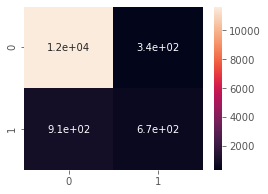

In [36]:
import warnings
# Filter out the specific warning messages
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#print(confusion_matrix(y_test, y_test_pred ))
plt.figure(figsize=(4, 3)) 
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);
print('Accuracy:', round(accuracy_score(y_test, y_test_pred),2)*100)
RFCCV = (cross_val_score(forest, X_train, y_train, cv=k_fold, n_jobs=1, 
                         scoring = 'accuracy').mean())
print(classification_report(y_test, y_test_pred))

According to the classification report, the model has an overall accuracy of 0.91, suggesting that it correctly predicts class labels for 91% of the occurrences in the dataset. The precision for class 1 is 0.93, with 93% of occurrences predicted as class 1 true positives. The precision for class 2 is 0.67, with 67% true positives. The recall for class 1 is 0.97, and the model correctly identified 97% of the cases in class 1. However, the recall for class 2 is 0.42, with just 42% of examples correctly detected.
Class 1 has an F1-score of 0.95, showing a strong balance of precision and recall. However, the F1-score for class 2 is 0.52, indicating a lesser performance. The number of instances in each class is shown by the support column, with class 1 having 11,977 and class 2 having 1,587. The model's performance for class 2 is considerably poorer, since the majority class dominates performance measurements. 

<Figure size 432x288 with 0 Axes>

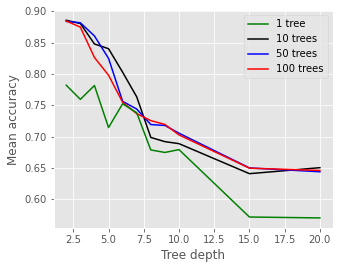

In [37]:
from sklearn.model_selection import cross_val_score
import math
from sklearn.ensemble import RandomForestClassifier
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
n_estimators_vals = [10,50,100]
mean_accuracy_store = []
sd_accuracy_store = []
k=5
for i, value in enumerate(n_estimators_vals):
    mean_accuracy_cv = []
    sd_cv = []
    for val in max_depth_vals:
        forest = RandomForestClassifier(n_estimators=value,
                                        bootstrap=True,
                                        max_features="auto",
                                        criterion='gini',
                                        max_depth=val,
                                        random_state=i,
                                        oob_score=False)
        cv_scores = cross_val_score(forest, X, y, cv=k)
        avg = sum(cv_scores)/len(cv_scores)
        sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
        mean_accuracy_cv.append(avg)
        sd_cv.append(sd)
    mean_accuracy_store.append(mean_accuracy_cv)
    sd_accuracy_store.append(sd_cv)

fig = plt.figure()
plt.figure(figsize=(5, 4)) 
ax = plt.axes()
line2, = ax.plot(max_depth_vals,mean_accuracy_store[0],
                 color='black',label='10 trees')
line3, = ax.plot(max_depth_vals,mean_accuracy_store[1],
                 color='blue',label='50 trees')
line4, = ax.plot(max_depth_vals,mean_accuracy_store[2],
                 color='red',label='100 trees')

mean_accuracy_cv = []
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], 
                                                random_state=3)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    mean_accuracy_cv.append(avg)
    
line1, = ax.plot(max_depth_vals,mean_accuracy_cv,color='green',
                 label='1 tree')

plt.legend(handles=[line1, line2, line3, line4])
plt.xlabel("Tree depth")
plt.ylabel("Mean accuracy")
plt.show();

The graph below compares the mean accuracy of various Random Forest models versus a single decision tree model. As the maximum depth increases, we can see how the mean accuracy varies. You can see that for all the random forest models, the accuracy decreases when max depth is increasing regardless the amount of trees in the model. However, having only one tree performs worse than other models with several trees when max depth is increasing.

## ANN

As a deep learning model, I am going to build an ANN model in this section. 
First, I am building a simple model with input layer, 1 hidden layer with 16 neurons and output layer. The hidden layer has the 'relu activation function while output layer has 'sigmoid' activation function. 'Sigmoid' activation function is mosre suitable when predicting binary values. The loss function indicates how well the model performs during training and 'binary_crossentropy' has been used in this case for binary classification task. The optimizer defines how the weights of the model are changed during training in order to minimise the loss function and 'adam' optimization algorithm which adapts the learning rate dynamically based on the gradients, resulting in efficient and faster convergence is used in the model. 


In [38]:
#Build the basic model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session
clear_session()
input_dim = 16
model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Tran the basic model
#history = model.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.2, batch_size=500)
history = model.fit(X_train, y_train, epochs=10, verbose=2, 
                    validation_split=0.2, batch_size=500)

Epoch 1/10
51/51 - 1s - loss: -1.1802e+02 - accuracy: 0.8371 - val_loss: -1.7450e+02 - val_accuracy: 0.8461 - 1s/epoch - 26ms/step
Epoch 2/10
51/51 - 0s - loss: -2.2097e+02 - accuracy: 0.8501 - val_loss: -2.9624e+02 - val_accuracy: 0.8569 - 131ms/epoch - 3ms/step
Epoch 3/10
51/51 - 0s - loss: -3.5021e+02 - accuracy: 0.8670 - val_loss: -4.4795e+02 - val_accuracy: 0.8825 - 130ms/epoch - 3ms/step
Epoch 4/10
51/51 - 0s - loss: -5.1060e+02 - accuracy: 0.8829 - val_loss: -6.3386e+02 - val_accuracy: 0.8831 - 216ms/epoch - 4ms/step
Epoch 5/10
51/51 - 0s - loss: -7.0813e+02 - accuracy: 0.8830 - val_loss: -8.5611e+02 - val_accuracy: 0.8831 - 169ms/epoch - 3ms/step
Epoch 6/10
51/51 - 0s - loss: -9.4839e+02 - accuracy: 0.8825 - val_loss: -1.1325e+03 - val_accuracy: 0.8817 - 154ms/epoch - 3ms/step
Epoch 7/10
51/51 - 0s - loss: -1.2443e+03 - accuracy: 0.8780 - val_loss: -1.4716e+03 - val_accuracy: 0.8780 - 165ms/epoch - 3ms/step
Epoch 8/10
51/51 - 0s - loss: -1.5958e+03 - accuracy: 0.8736 - val_loss

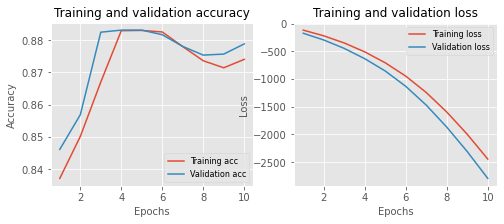

In [40]:
# Function for plotting the training & validation curves
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, label='Training acc')
    plt.plot(x, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy', fontsize=12)  
    plt.legend(fontsize=8) 
    plt.xlabel('Epochs', fontsize=10) 
    plt.ylabel('Accuracy', fontsize=10) 
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss')
    plt.plot(x, val_loss, label='Validation loss')
    plt.title('Training and validation loss', fontsize=12) 
    plt.legend(fontsize=8)  
    plt.xlabel('Epochs', fontsize=10) 
    plt.ylabel('Loss', fontsize=10)  
plot_history(history);

In [41]:
#Evaluating basic model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy of basic model: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy od basic model:  {:.4f}".format(accuracy))

# Get predicted labels for X_NN
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
df_pred = pd.DataFrame({'Predicted_Rating': y_pred_labels})

Training Accuracy of basic model: 0.8765
Testing Accuracy od basic model:  0.8784
424/424 [==============================] - 1s 1ms/step


Next, I am adding 2 more hidden layers with 'relu' activation functions to evaluate the model to see if the ANN model could be improved

In [49]:
#Second ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session
clear_session()

input_dim = 16
model = Sequential()
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,169
Trainable params: 5,169
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Training second ANN model
history = model.fit(X_train, y_train, epochs=20, verbose=2, 
                    validation_split=0.2, batch_size=500)

Epoch 1/20
51/51 - 1s - loss: -2.2997e+02 - accuracy: 0.8802 - val_loss: -7.4501e+02 - val_accuracy: 0.8831 - 745ms/epoch - 15ms/step
Epoch 2/20
51/51 - 0s - loss: -3.0074e+03 - accuracy: 0.8830 - val_loss: -8.0820e+03 - val_accuracy: 0.8831 - 191ms/epoch - 4ms/step
Epoch 3/20
51/51 - 0s - loss: -2.1143e+04 - accuracy: 0.8830 - val_loss: -4.5499e+04 - val_accuracy: 0.8831 - 218ms/epoch - 4ms/step
Epoch 4/20
51/51 - 0s - loss: -9.1043e+04 - accuracy: 0.8830 - val_loss: -1.7010e+05 - val_accuracy: 0.8831 - 162ms/epoch - 3ms/step
Epoch 5/20
51/51 - 0s - loss: -2.9447e+05 - accuracy: 0.8830 - val_loss: -4.9356e+05 - val_accuracy: 0.8831 - 170ms/epoch - 3ms/step
Epoch 6/20
51/51 - 0s - loss: -7.5095e+05 - accuracy: 0.8830 - val_loss: -1.1614e+06 - val_accuracy: 0.8831 - 163ms/epoch - 3ms/step
Epoch 7/20
51/51 - 0s - loss: -1.6377e+06 - accuracy: 0.8830 - val_loss: -2.3893e+06 - val_accuracy: 0.8831 - 170ms/epoch - 3ms/step
Epoch 8/20
51/51 - 0s - loss: -3.2048e+06 - accuracy: 0.8830 - val_l

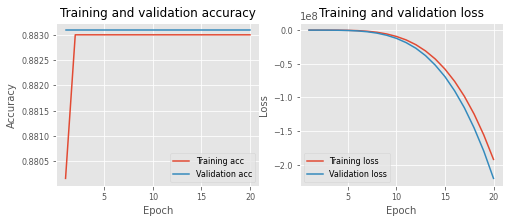

In [52]:
# Function for plotting the training & validation curves
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, label='Training acc')
    plt.plot(x, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy', fontsize=12) 
    plt.legend(fontsize=8) 
    plt.xlabel('Epoch', fontsize=10) 
    plt.ylabel('Accuracy', fontsize=10) 
    plt.xticks(fontsize=8) 
    plt.yticks(fontsize=8)

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss')
    plt.plot(x, val_loss, label='Validation loss')
    plt.title('Training and validation loss', fontsize=12)  
    plt.legend(fontsize=8) 
    plt.xlabel('Epoch', fontsize=10) 
    plt.ylabel('Loss', fontsize=10) 
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)  
    
plot_history(history);

In [53]:
#Evaluating second model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy of second model: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy of second model:  {:.4f}".format(accuracy))

Training Accuracy of second model: 0.8830
Testing Accuracy of second model:  0.8830


You can see that the model has been improved slightly.
Next, I am going to apply hyperparameter testing. The hyperparameters include batch_size, epochs, and learning_rate. It is creating the GridSearchCV Object which will store the results for each combination of hyperparameters when the model trains and evaluates. Then, the best combination of hyperparameters is obtained by accessing the best_params_ attribute of the GridSearchCV object. 

In [46]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(32, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)
param_grid = {
    'batch_size': [7500, 12000],
    'epochs': [5, 15],
    'learning_rate': [0.001, 0.01]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, verbose=0)
print("Best Hyperparameters: ", grid_result.best_params_)

<ipython-input-46-19bd23cae9aa>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


1/1 [==============================] - 0s 134ms/step - loss: 0.3370 - accuracy: 0.8838
Best Hyperparameters:  {'batch_size': 7500, 'epochs': 15, 'learning_rate': 0.01}


According to the results of hyperparameter testing, I can set up the new ANN model. 

In [47]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

# Create a function that returns the compiled model
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(32, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn estimator
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters and their possible values
param_grid = {
    'batch_size': [7500],
    'epochs': [15],
    'learning_rate': [0.01]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search to the training data
grid_result = grid.fit(X_train, y_train, verbose=0)

<ipython-input-47-b4f96f0c8a0e>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


2/2 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8843


In [48]:
grid_result.best_score_

0.8833064834276835

The model has slightly been improved. 

# Conclusion

To conclude, I can summarize the results as follows,

- Decision Tree Classifier
    - The decision tree model with a tree depth of 3 achieved an accuracy of 90%.
    - Applying k-fold cross validaton received an average performance of approximately 75.9% with a standard deviation of 21.0%.
- Random Forest classifier
    - Achieved an accuracy of 91% on the test set
    - Class 1 had a greater accuracy (0.93) and recall (0.97) than class 2, indicating better ability in predicting class 1 cases.
    - Class 2 exhibited lower accuracy (0.67), recall (0.42), and F1-score (0.52), indicating a weaker prediction ability.
    - The number of instances in each class is shown in the support column, with class 1 having more instances (11,977) than class 2 (1,587).
- ANN
    - The basic artificial neural network (ANN) model obtained 87.52% training accuracy and 87.68% testing accuracy.
    - When compared to the basic ANN model, the upgraded ANN model achieved a higher training accuracy of 88.30% and the same testing accuracy of 88.30%.
    - The grid search with hyperparameter testing yielded the optimum hyperparameter combination: 'batch_size': 7500, 'epochs': 15, 'learning_rate': 0.01.
    - During the grid search, the best score was 0.8838.
    
Overall, the random forest model outperformed the decision tree model, with an accuracy of 91% on the test set. The basic ANN model performed somewhat well, however the enhanced ANN model performed slightly better in training. 


